# Clustering Crypto

In [75]:
# Initial imports
import pandas as pd
import hvplot.pandas
#from path import Path
import plotly.express as px
import matplotlib.pyplot as plt
from bokeh.models import HoverTool
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Deliverable 1: Preprocessing the Data for PCA

In [39]:
# Load the crypto_data.csv dataset.
crypto_df = pd.read_csv("crypto_data.csv", index_col="Unnamed: 0")
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [40]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [41]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop("IsTrading", axis=1)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [42]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [43]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [46]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coin_names_df = crypto_df[["CoinName"]]
coin_names_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [47]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop("CoinName", axis=1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [48]:
# Use get_dummies() to create variables for text features.
# Create dummy variables for the categorical variables
crypto_df_dummies = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
crypto_df_dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Standardize the numeric data
x = StandardScaler().fit_transform(crypto_df_dummies)
x

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [50]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)
principal_components

array([[-0.33154399,  1.1166617 , -0.56284026],
       [-0.31487604,  1.11670665, -0.56334367],
       [ 2.30225361,  1.70923805, -0.66895175],
       ...,
       [ 0.32101713, -2.29449821,  0.38713364],
       [-0.14643735, -2.14819432,  0.29355226],
       [-0.29003951,  0.75608852, -0.28253279]])

In [51]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    data = principal_components, 
    columns = ["PC 1", "PC 2", "PC 3"],
    index = crypto_df.index)
pcs_df.head()

,PC 1,PC 2,PC 3
42,-0.331544,1.116662,-0.562840
404,-0.314876,1.116707,-0.563344
1337,2.302254,1.709238,-0.668952
BTC,-0.144665,-1.320111,0.185464
ETH,-0.149399,-2.048760,0.393857


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

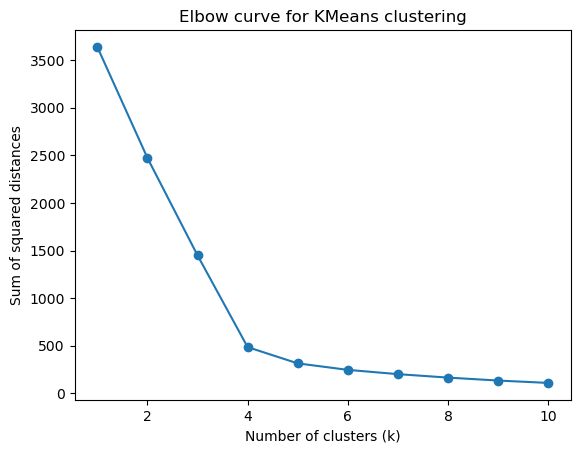

In [52]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of squared distances")
plt.title("Elbow curve for KMeans clustering")
plt.show()

Running K-Means with `k=4`

In [53]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0,

In [54]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df ,pcs_df], axis=1)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = coin_names_df

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.331544,1.116662,-0.562840,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.314876,1.116707,-0.563344,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.302254,1.709238,-0.668952,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.144665,-1.320111,0.185464,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.149399,-2.048760,0.393857,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.162296,-1.072213,-0.016567,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.397251,1.315455,-0.472247,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.150582,-2.177158,0.409573,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.147841,-2.048868,0.393830,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.146436,-2.148194,0.293552,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [57]:
# Creating a 3D-Scatter with the PCA data and the clusters

fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    width=800,
    hover_name="CoinName",
    hover_data=["Algorithm", "TotalCoinsMined", "TotalCoinSupply"],
    color_continuous_scale="Viridis"
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [59]:
# Create a table with tradable cryptocurrencies.
clustered_df_hvplot = clustered_df.hvplot.table(columns=['CoinName','Algorithm','ProofType','TotalCoinSupply','TotalCoinsMined','Class'], sortable = True,selectable = True)
clustered_df_hvplot

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [62]:
# Print the total number of tradable cryptocurrencies.
number_crypto = clustered_df['CoinName'].count()
print(f'There are {number_crypto} tradable cryptocurrencies')

There are 532 tradable cryptocurrencies


In [67]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
cluster_df = clustered_df[['TotalCoinSupply', 'TotalCoinsMined']]
scale_cluster_df = MinMaxScaler().fit_transform(cluster_df)
scale_cluster_df 

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [71]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
index = (clustered_df.index.tolist())
scale_cluster_df = pd.DataFrame(data = scale_cluster_df, columns=["TotalCoinSupply", "TotalCoinsMined"], index = index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
scale_cluster_df['CoinName'] = coin_names_df

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
class_df = clustered_df['Class']
scale_cluster_df = scale_cluster_df.join(class_df, how='inner')

scale_cluster_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,3
ETH,0.000000e+00,0.000109,Ethereum,3
LTC,8.400000e-05,0.000064,Litecoin,3
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,3
ETC,2.100000e-04,0.000115,Ethereum Classic,3
ZEC,2.100000e-05,0.000007,ZCash,3


In [77]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
scatter = scale_cluster_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class", hover_cols=['CoinName'],
                            xlabel="Total Coins Mined",
                            ylabel="Total Coins Supply")

# Create a HoverTool to show the CoinName
hover = HoverTool(tooltips=[('CoinName', '@CoinName')])

# Add the HoverTool to the scatter plot
scatter = scatter.opts(tools=[hover])

scatter

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)